A classification problem involves predicting whether something is one thing or another.

For example:

* Predict whether or not someone has heart disease based on their health parameters. This is called binary classification since there are only two options.
* Decide whether a photo of is of food, a person or a dog. This is called multi-class classification since there are more than two options.
* Predict what categories should be assigned to a Wikipedia article. This is called multi-label classification since a single article could have more than one category assigned.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


##Creating data to view and fit

Since classification is predicting whether something is one thing or another, let's make some data to reflect that.

We'll use Scikit-Learn's make_circles() function.

In [3]:
from sklearn.datasets import make_circles

# create 1000 samples
n_samples = 1000

# Create Circles
X, y = make_circles(n_samples,
                     noise=0.03,
                     random_state=42)


Wonderful, now we've created some data, let's look at the features (X) and labels (y).



In [4]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
# first 10 labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Visualising the Data

Using pandas library

In [9]:
# Making DataFrame of labels and features
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


X0 and X1 are coordinates of dots (Red or Blue)

In [15]:
# Checking if this is binary of multi-class Classification
len(y), circles.label.value_counts()


(1000,
 1    500
 0    500
 Name: label, dtype: int64)

So its a binary classification

Let's take our visualization a step further and plot our data.



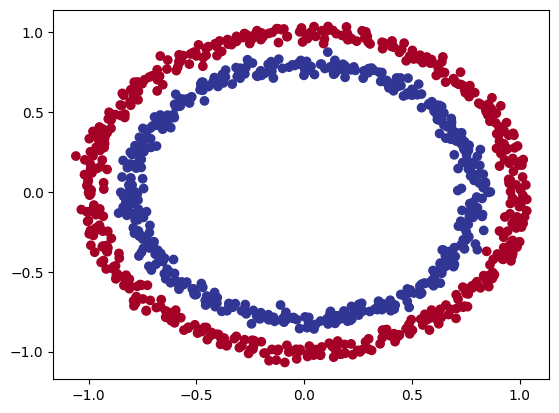

In [22]:
# Visualise the data
import matplotlib.pyplot as plt
plt.scatter(X[: ,0], X[: ,1], c=y, cmap=plt.cm.RdYlBu)

We will try and build one to classify blue or red dots. As in, a model which is able to distinguish blue from red dots.



## Input and output shapes

We will come across problems regarding shapes of input and output data, so its good to check there shapes.

we want to input X and get our model to predict y.

So let's check out the shapes of X and y.

In [23]:
# Checking shapes of label and feature
X.shape, y.shape

((1000, 2), (1000,))

shapes of X and y are different , but where is this coming from


In [24]:
len(X), len(y)

(1000, 1000)




Both have the same number of  samples, lets check the first sample

In [26]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

Since X accepts 2 coordinates, it has 2 dimenstions , whereas y has only 1 output to give (either 0 or 1).

This means our neural network input shape will has to accept a tensor with at least one dimension being two and output a tensor with at least one value.

## Steps in Modelling

There are typically 3 fundamental steps to creating and training a model.

1. Creating a model - piece together the layers of a neural network yourself (using the functional or sequential API) or import a previously built model (known as transfer learning).
2. Compiling a model - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. Fitting a model - letting the model try to find patterns in the data (how does X get to y).

We will use Regression model to see if it works

In [29]:
# set random seed
tf.random.set_seed(42)

# Creating the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#Compiling the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 classes (0 ,1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Fit the model
model_1.fit(X, y, epochs=5)


Epoch 1/5
32/32 [==============================] - 2s 5ms/step - loss: 4.1276 - accuracy: 0.4720
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 1.9056 - accuracy: 0.4990
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7313 - accuracy: 0.4940
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7055 - accuracy: 0.4960
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 0.6979 - accuracy: 0.4920


Accuracy is only 50% , i.e. our model is guessing ,
Lets try training it for longer

In [30]:
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Still Guessing, Accuracy = 50%

Lets try adding another layer, and train for longer

In [32]:
# set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Fit the model
model_2.fit(X, y, epochs=100, verbose=0) # verbose=0 to print less output


In [33]:
# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 2s 11ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932435631752014, 0.5]

Still not improving, we need to do something different


## Improving the model

To improve our model, we can alter almost every part of the 3 steps we went through before.

1. Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. Compiling a model - you might want to choose a different optimization function (such as the Adam optimizer, which is usually pretty good for many problems) or perhaps change the learning rate of the optimization function.
3. Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer).


Generally its called "hyperparameter tuning"

Lets try adding more neurons, an extra layer and the Adam optimizer



In [35]:
# set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
model_3.fit(X, y, epochs=100)



Epoch 1/100
32/32 [==============================] - 2s 3ms/step - loss: 2.2096 - accuracy: 0.4850
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7092 - accuracy: 0.4630
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4710
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4750
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.4560
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.5190
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.4940
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.4910
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.4430
Epoch 11/

Still!

We've pulled out a few tricks but our model isn't even doing better than guessing.

To visualize our model's predictions we're going to create a function plot_decision_boundary() which:

* Takes in a trained model, features (X) and labels (y).
* Creates a meshgrid of the different X values.
* Makes predictions across the meshgrid.
* Plots the predictions as well as a line between the different zones (where each unique class falls).

In [36]:

import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())



We can also import this fuction from my github repo,  https://raw.githubusercontent.com/nikbhaladhare2104/TensorFlow-functions/TensorFlow/helper_functions.py

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


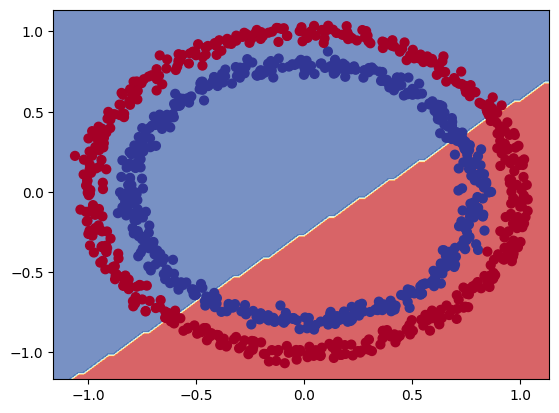

In [37]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)


Looks like our model is trying to draw a straight line through the data.

The main issue is our data isn't separable by a straight line.
This might (model_3) work for regression problems.

Lets try this for regression problem.

In [38]:
import numpy as np

In [39]:
# set random seed
tf.random.set_seed(42)

# Cresting some regression data
X_reg = np.arange(0, 1000, 5)
y_reg = np.arange(100, 1100, 5)

len(X_reg), len(y_reg)

(200, 200)

In [40]:
# splitting it into train and test data
X_reg_train = X_reg[:150]
y_reg_train = y_reg[:150]

X_reg_test = X_reg[150:]
y_reg_test = y_reg[150:]


In [41]:
# fitting the model_3 on regression data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100, verbose=0)

ValueError: ignored

In [42]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               300       
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


we compiled our model for a binary classification problem.

 we have to  recreate it for a regression problem.

In [46]:
# set random seed
tf.random.set_seed(42)

#Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Comile the model
model_4.compile(loss=tf.keras.losses.mae, # changing the loss function to regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # same with metrics

# fit the model
model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)


Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 566.5034 - mae: 566.5034
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 481.4803 - mae: 481.4803
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 399.8076 - mae: 399.8076
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 315.0363 - mae: 315.0363
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 226.3480 - mae: 226.3480
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 129.4867 - mae: 129.4867
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 53.4812 - mae: 53.4812
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 71.9266 - mae: 71.9266
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 70.8011 - mae: 70.8011
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 49.0077 - mae: 49.0077
Epoch 11/100
5/5 [=============================

Okay, it seems like our model is learning something (the mae value trends down with each epoch), let's plot its predictions.



In [47]:
# Make predictions with our trained model
y_reg_preds = model_4.predict(y_reg_test)

2/2 [==============================] - 0s 5ms/step


In [48]:
# Plot the model's predictions against our regression data,
# we have to import helper dunction from my repo

!wget https://raw.githubusercontent.com/nikbhaladhare2104/TensorFlow-functions/TensorFlow/helper_functions_1.py


--2023-07-29 08:41:07--  https://raw.githubusercontent.com/nikbhaladhare2104/TensorFlow-functions/TensorFlow/helper_functions_1.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1586 (1.5K) [text/plain]
Saving to: ‘helper_functions_1.py’

helper_functions_1. 100%[===================>]   1.55K  --.-KB/s    in 0s      

2023-07-29 08:41:07 (17.5 MB/s) - ‘helper_functions_1.py’ saved [1586/1586]



In [49]:
from helper_functions_1 import plot_predictions

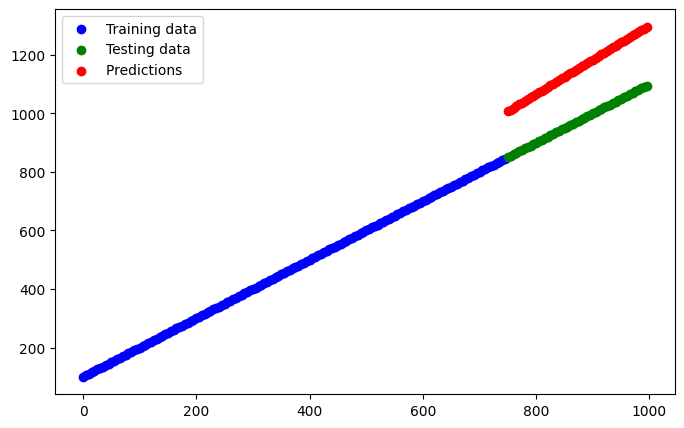

In [50]:
plot_predictions(X_reg_train, y_reg_train, X_reg_test, y_reg_test, y_reg_preds)

Okay, the predictions aren't perfect (if the predictions were perfect, the red would line up with the green), but they look better than complete guessing.

So this means our model must be learning something...

There must be something we're missing out on for our classification problem.

## The missing piece: Non-linearity